<a href="https://colab.research.google.com/github/SudarshanIngole/Internship_Reports_Rubixe/blob/main/PRCP_Portuges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [43]:
data = pd.read_csv('bank-additional-full.csv',sep=";" )

# Basic Checks

In [44]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [45]:
pd.set_option('display.max_column', None)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [46]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [47]:

data.shape

(41188, 21)

* There are 41188 Rows and 21 Columns including our target variable.


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [49]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


* From above table we get some important information
* Age : Minimum = 17 , Maximum = 98
* In the 'pdays' column there are more than 75 % values are fixed that is 999

In [50]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [51]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


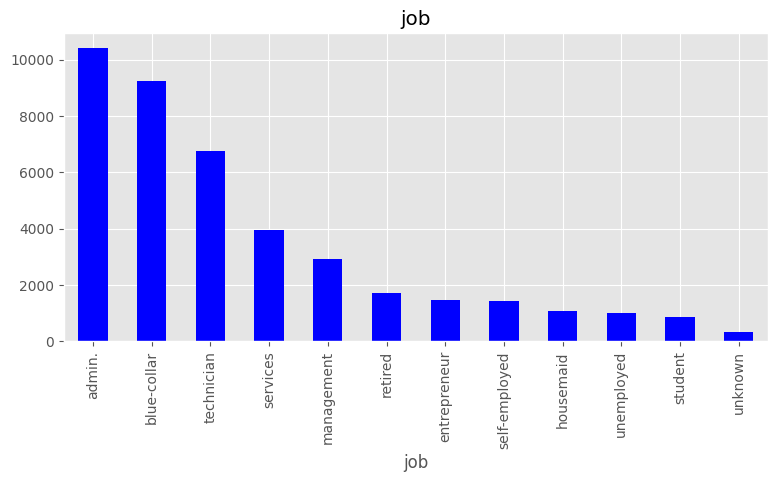

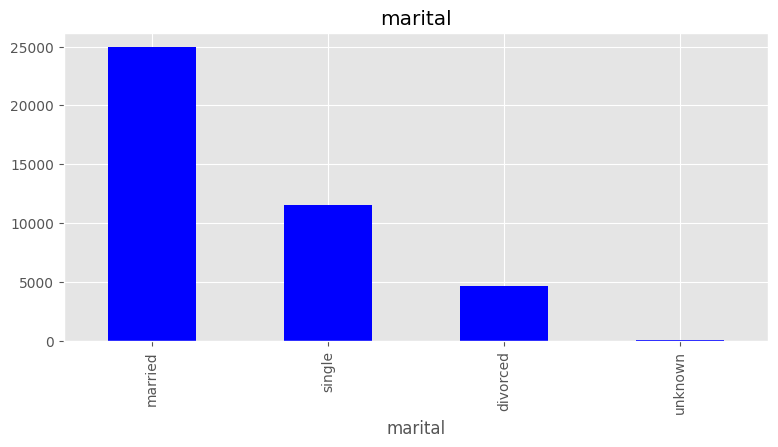

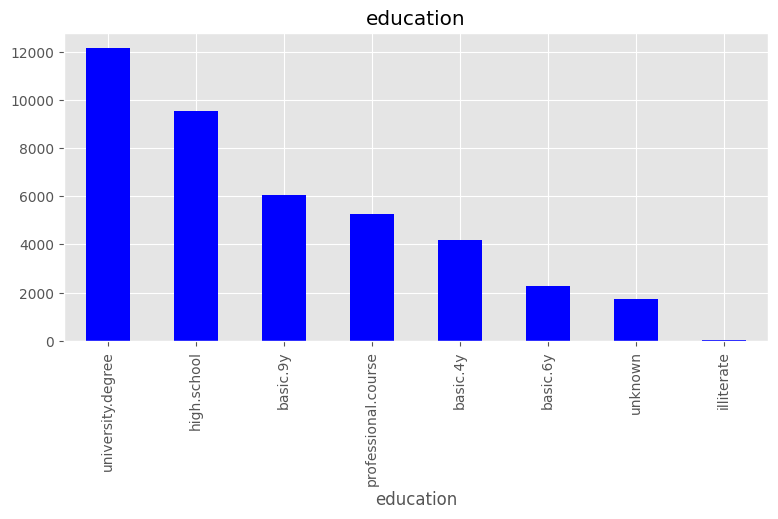

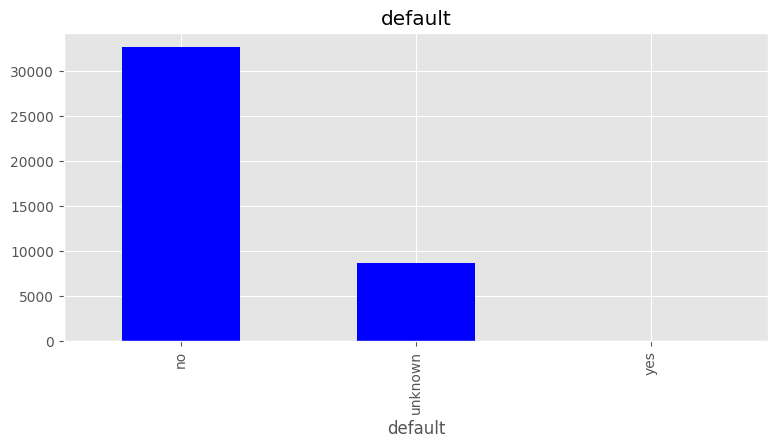

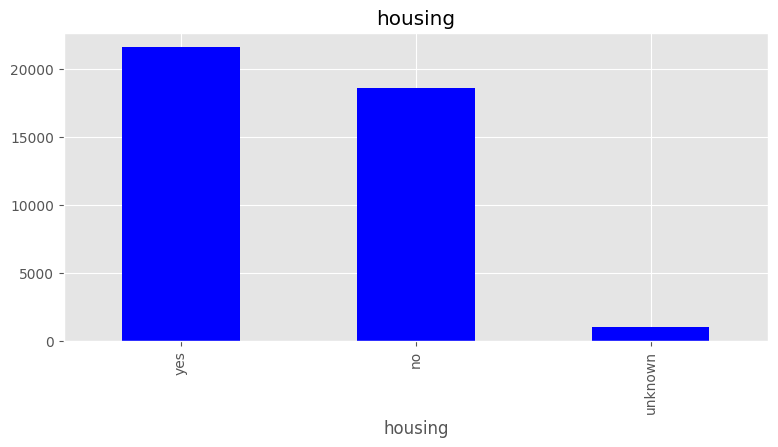

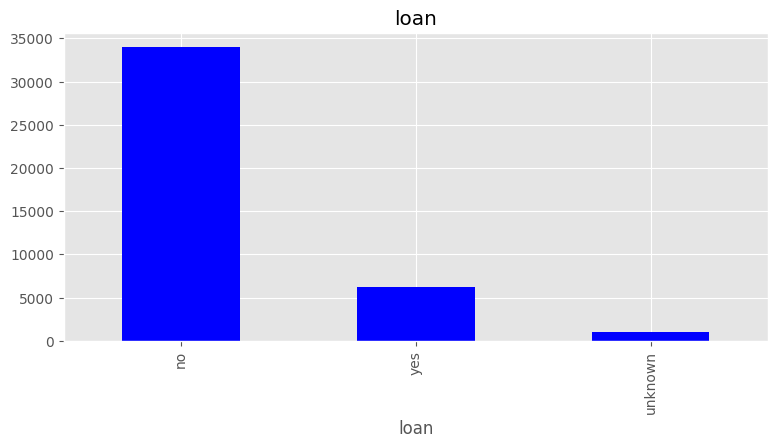

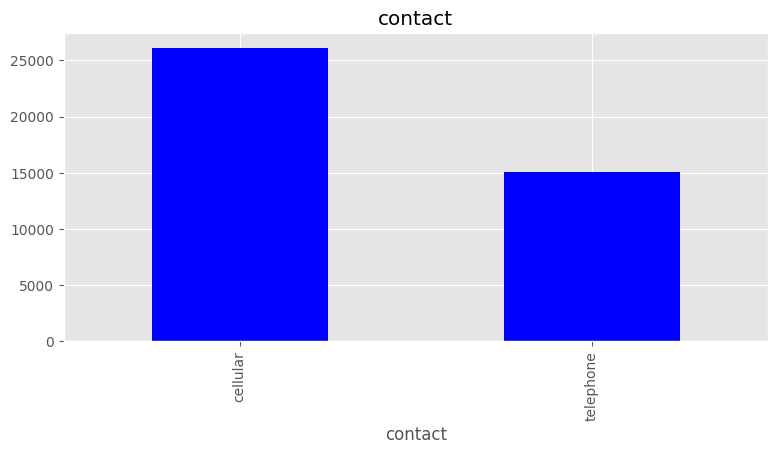

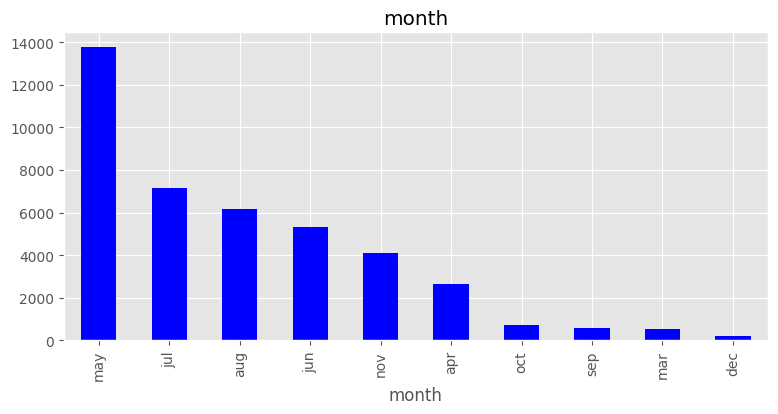

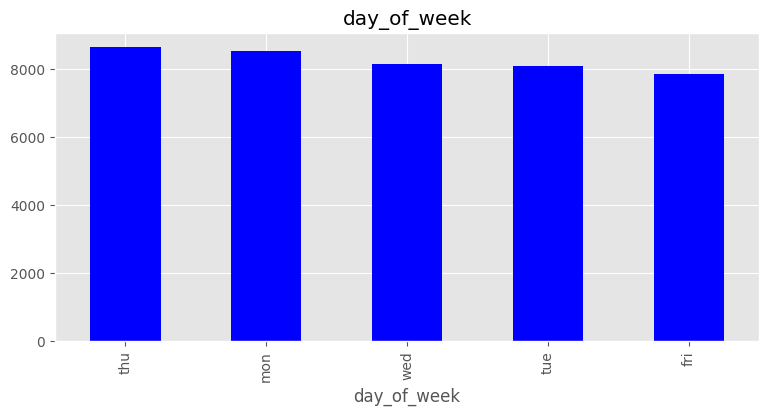

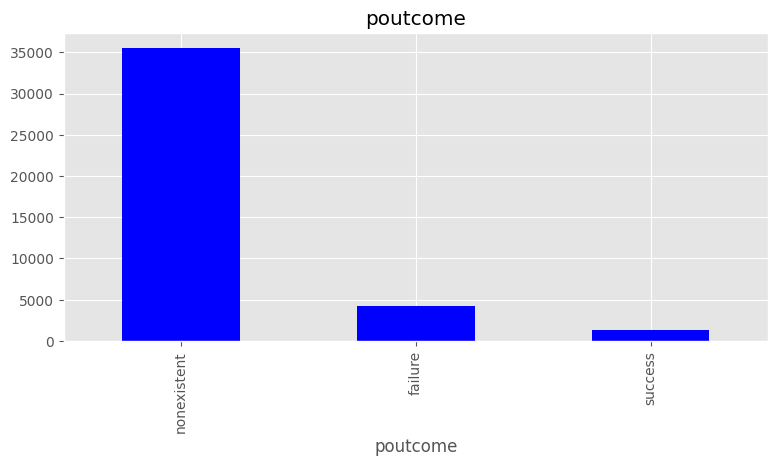

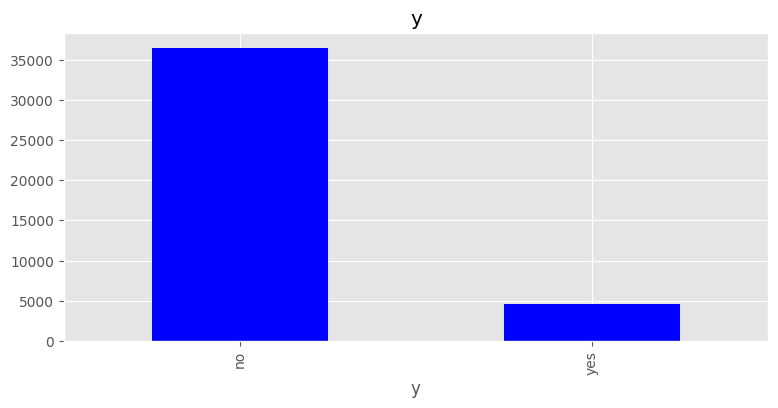

In [53]:
categorical_col = data.select_dtypes(include=['object'])
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar',  color='b')
    plt.title(column)

In [54]:
categorical_col

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


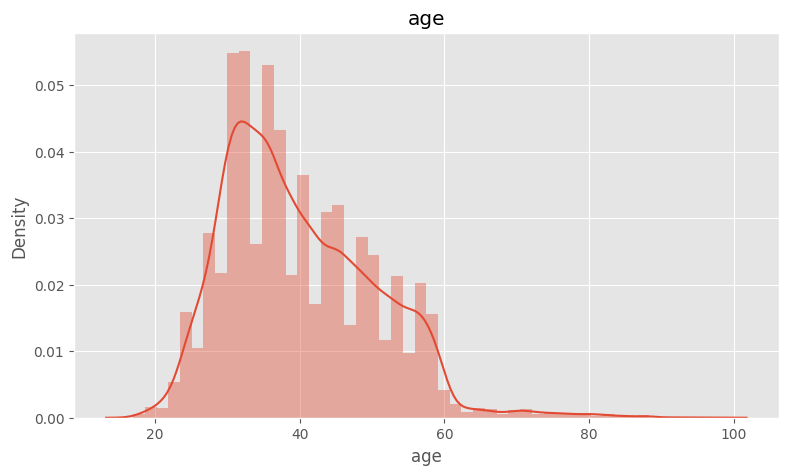

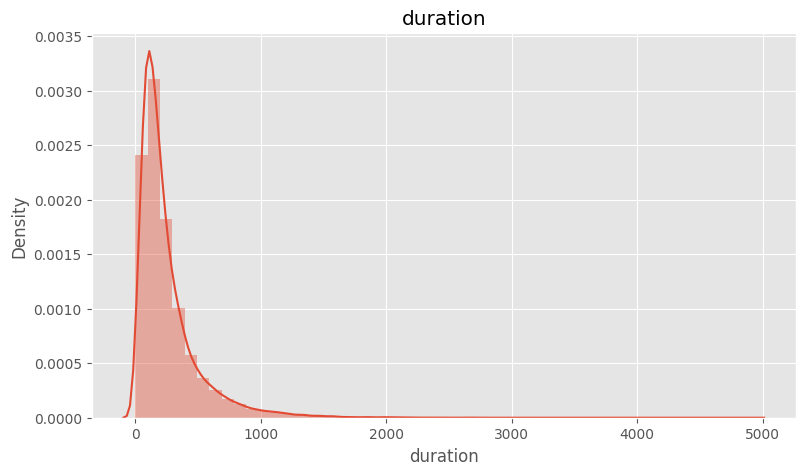

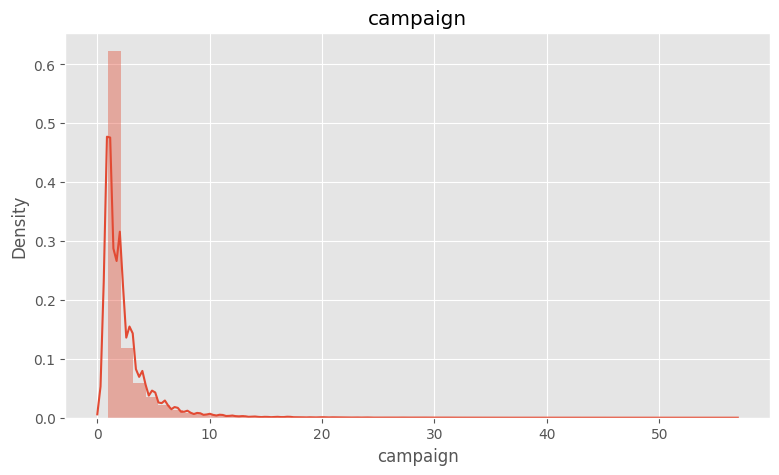

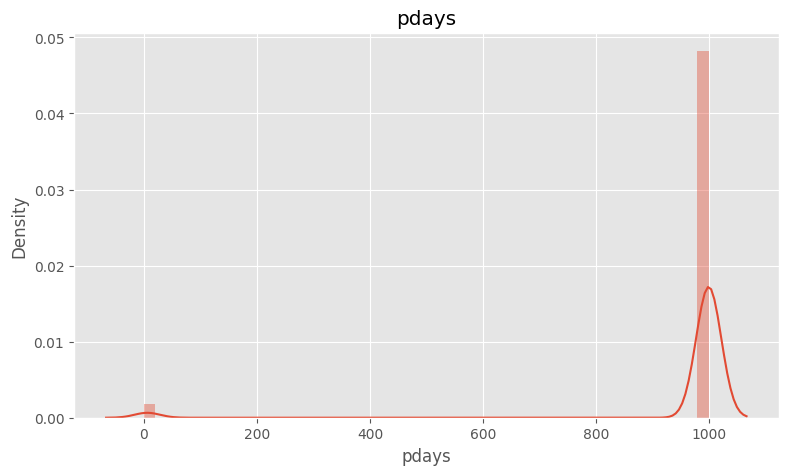

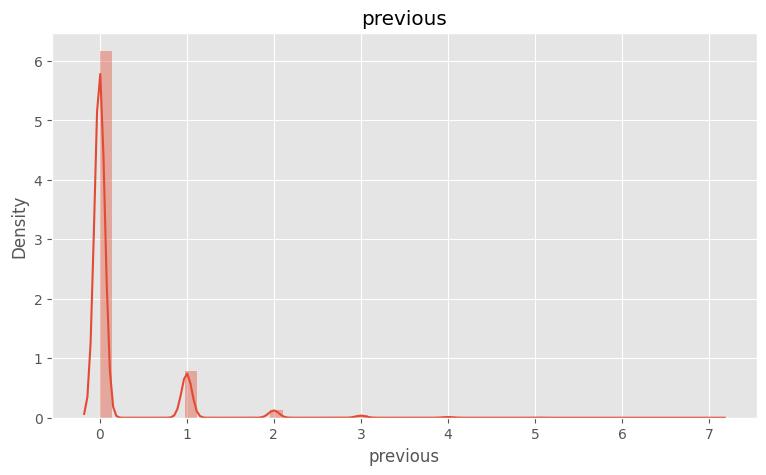

In [76]:
numeric_col=data.select_dtypes(include='int64')
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(data[column])
    plt.title(column)

# Data Cleaning

* There are no null values in dataset
* But there are some values with *unknown* label, we have to remove it or replace it
* Let's do it one by one

In [71]:
for column in categorical_col:
  mode=data[column].mode()[0]
  data[column]=data[column].replace('unknown', mode)
  data[column]=data[column].replace('other', mode)

* By above code we have replaced *unknown* value to it's mode of respective column

* Firstly we are going to analyse Age feature


In [57]:
data.age

0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, Length: 41188, dtype: int64

In [58]:
data.age.isnull().sum()

0

* In Age column there are no null values
* so we are good to go to explore all other column relations with age column

In [59]:
print('The maximum age of a customer is : ', data.age.max())
print('The minimum age of a customer is : ', data.age.min())

The maximum age of a customer is :  98
The minimum age of a customer is :  17


In [60]:
data.loc[data['age']==data['age'].max()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38452,98,retired,married,basic.4y,no,yes,no,cellular,oct,fri,476,1,2,2,success,-3.4,92.431,-26.9,0.73,5017.5,yes
38455,98,retired,married,basic.4y,no,yes,no,cellular,oct,fri,272,2,999,0,nonexistent,-3.4,92.431,-26.9,0.73,5017.5,yes


In [61]:
data.loc[data['age']==data.age.min()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37140,17,student,single,university.degree,no,yes,no,cellular,aug,wed,432,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,182,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,92,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
37579,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,498,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
38274,17,student,single,university.degree,no,no,yes,cellular,oct,tue,896,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes


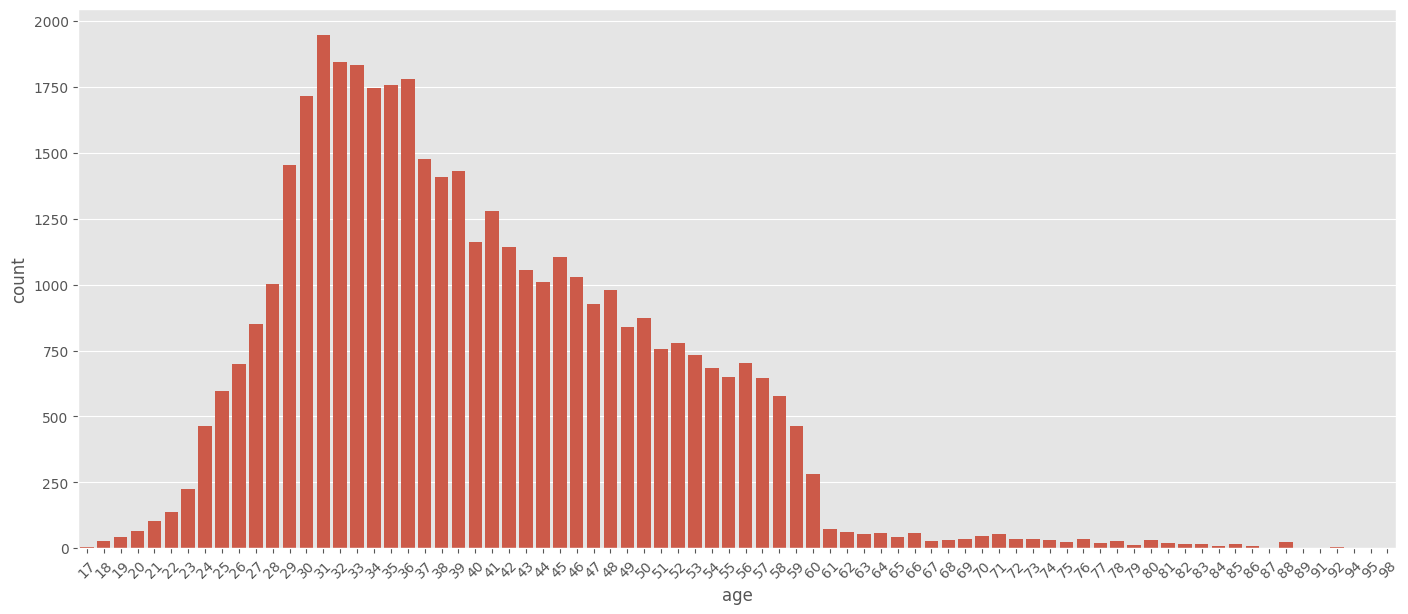

In [62]:
plt.figure(figsize=(17,7))
sns.countplot(x='age', data=data)
plt.xticks(rotation=45)
plt.show()

* From the above plot we can see that there are maximum number of age between 24 to 60

<Axes: xlabel='age', ylabel='Count'>

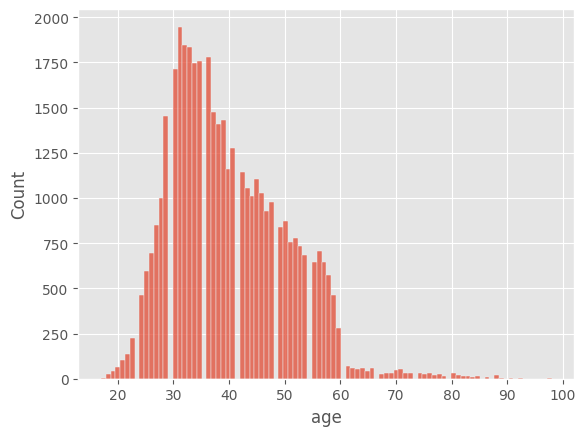

In [63]:
sns.histplot(x='age', data=data)

<Figure size 1700x700 with 0 Axes>

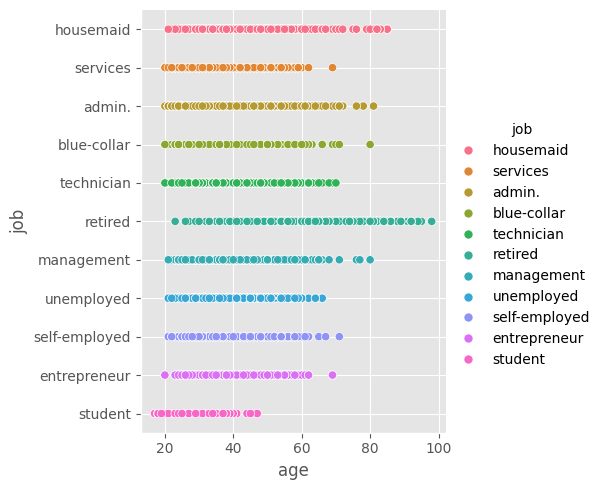

In [65]:
plt.figure(figsize=(17,7))
sns.relplot(x='age', y='job', hue='job', data=data)
plt.show()

<Axes: xlabel='age', ylabel='duration'>

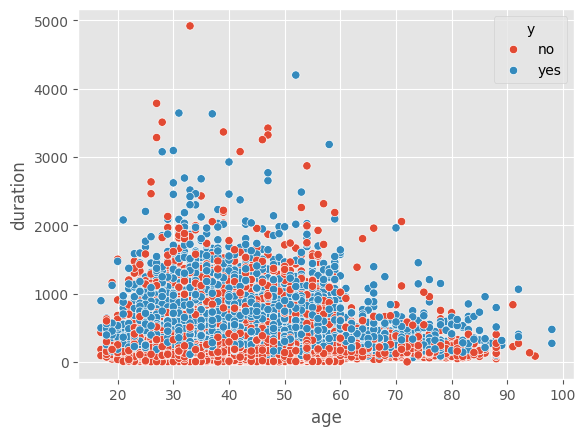

In [67]:
sns.scatterplot(x='age', y='duration',hue='y', data=data)

<Axes: xlabel='age', ylabel='Density'>

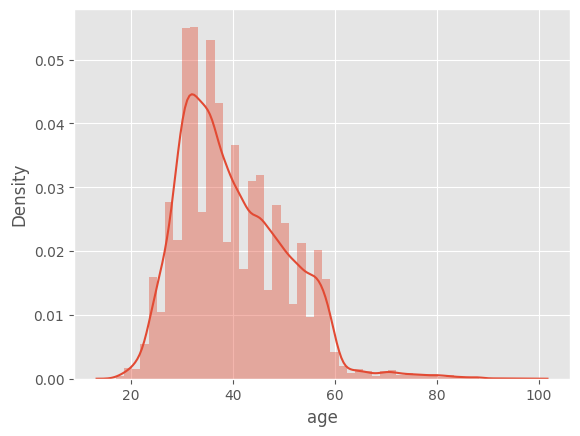

In [70]:
sns.distplot(data['age'])

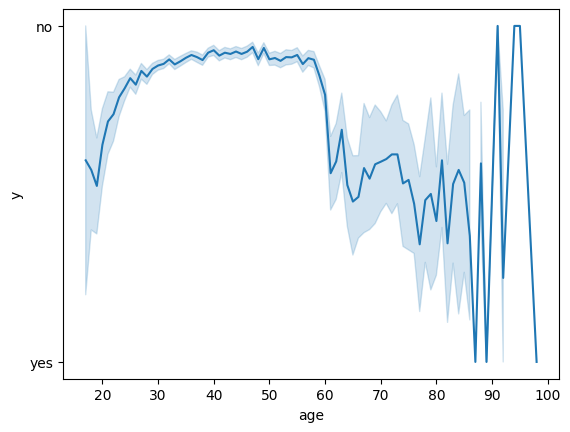

In [ ]:
sns.lineplot(x='age', y='y', data=data)
plt.show()

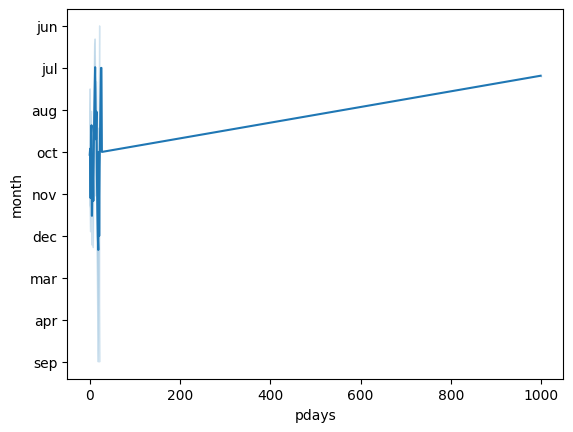

In [ ]:
sns.lineplot(x='pdays', y='month', data=data)
plt.show()

<Axes: xlabel='pdays', ylabel='count'>

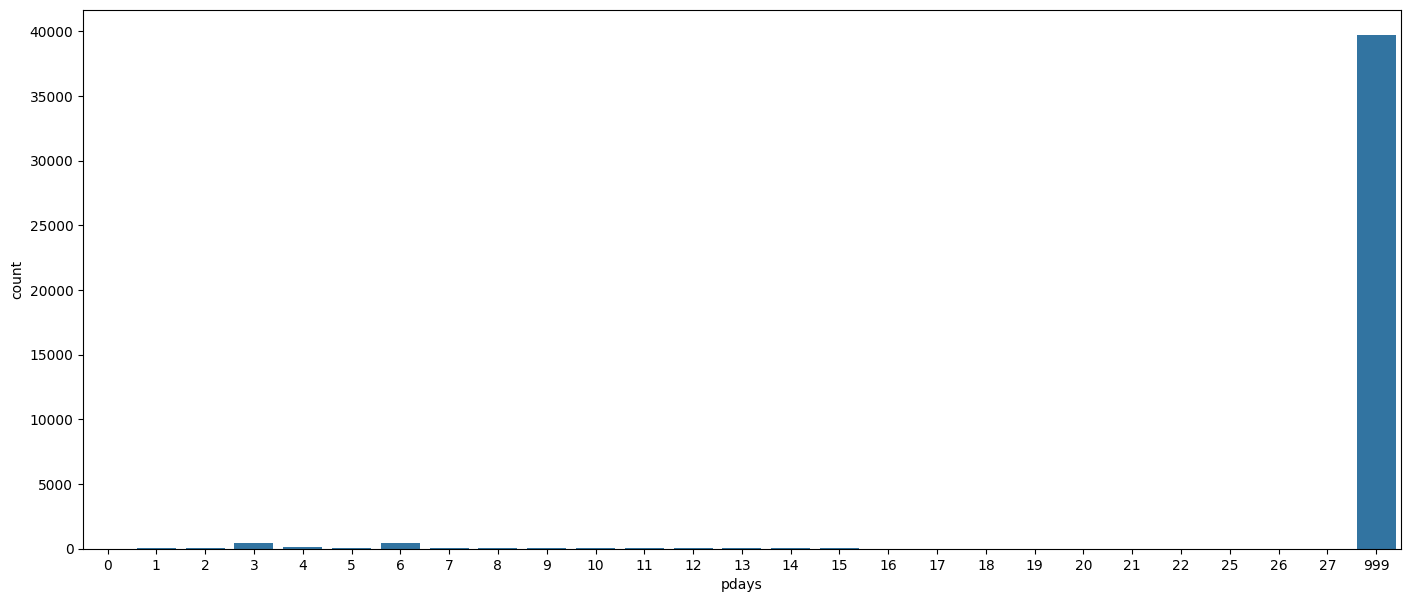

In [ ]:
plt.figure(figsize=(17,7))
sns.countplot(x='pdays', data=data)

<Axes: xlabel='pdays'>

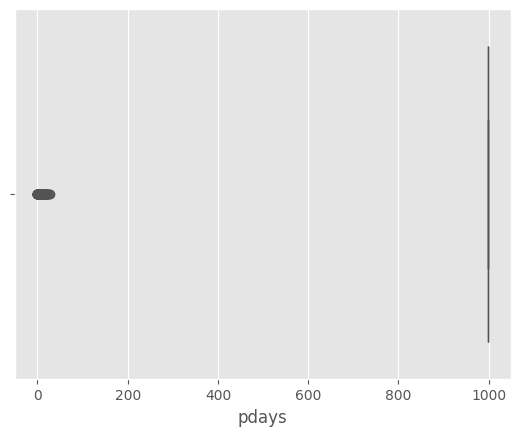

In [72]:
sns.boxplot(x='pdays', data=data)

<Axes: xlabel='pdays', ylabel='Count'>

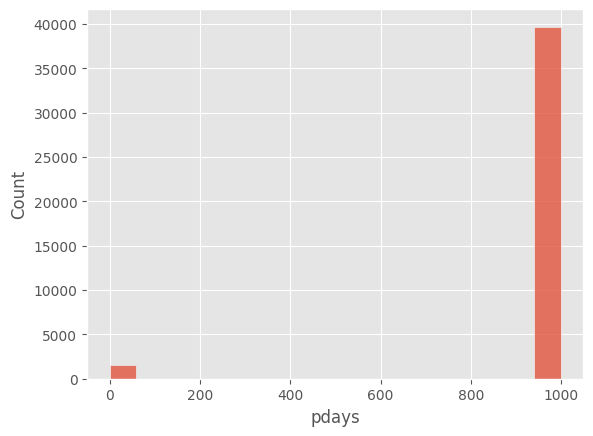

In [73]:
sns.histplot(x='pdays', data=data)

In [ ]:
data['pdays'].value_counts().get(0,0)

15

In [14]:
data.job.value_counts()

job
admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

In [15]:
data.job.value_counts()

job
admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

In [19]:
data.education.mode()[0]

'university.degree'

In [20]:
print(data['marital'].value_counts())

marital
married     25008
single      11568
divorced     4612
Name: count, dtype: int64


In [21]:
data.marital.value_counts()

marital
married     25008
single      11568
divorced     4612
Name: count, dtype: int64

In [22]:
print(data['education'].value_counts())

education
university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64


* There are 1731 unknown elements in education column, let's fixed this with mode of education column that is *university.degree*

In [95]:
data.default.value_counts()

default
no     41185
yes        3
Name: count, dtype: int64

In [27]:
mode

'no'

In [28]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
col_to_encode=['job', 'marital','education', 'default', 'housing','loan','month', 'contact', 'day_of_week','poutcome']
col_to_encode

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'month',
 'contact',
 'day_of_week',
 'poutcome']

In [86]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [87]:
for col in col_to_encode:
  data[col] = lb.fit_transform(data[col])

 # Univariate Analysis

In [32]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,0,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [88]:
data['y']=data.y.map({'no':0, 'yes':1})

In [89]:
pd.reset_option('display.max_rows', None)
data.head(100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,7,1,5,0,1,0,1,6,1,221,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
96,42,4,1,6,0,0,0,1,6,1,426,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
97,53,0,0,6,0,0,0,1,6,1,287,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
98,37,9,2,5,0,0,0,1,6,1,197,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [38]:
data.y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [90]:
x=data.drop(columns=['y'])
y=data['y']

In [91]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,0,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,1,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [92]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split

In [100]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30 ,random_state=47)

In [101]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
13316,28,7,1,3,0,1,0,1,3,4,145,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1
30736,38,9,1,6,0,1,0,0,6,3,55,1,999,1,0,-1.8,92.893,-46.2,1.344,5099.1
13529,36,1,1,2,0,1,0,0,3,2,217,1,999,0,1,1.4,93.918,-42.7,4.963,5228.1
34433,28,1,0,3,0,0,0,0,6,2,307,1,999,2,0,-1.8,92.893,-46.2,1.266,5099.1
31438,30,0,0,3,0,1,0,0,6,4,422,1,999,1,0,-1.8,92.893,-46.2,1.334,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35863,37,9,1,6,0,1,1,0,6,0,239,1,999,0,1,-1.8,92.893,-46.2,1.259,5099.1
25267,50,3,1,0,0,0,0,0,7,3,878,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8
23112,32,0,1,6,0,1,1,0,1,3,24,12,999,0,1,1.4,93.444,-36.1,4.965,5228.1
11528,50,7,0,6,0,0,0,1,4,0,250,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1


In [102]:
y_train

13316    0
30736    0
13529    0
34433    1
31438    0
        ..
35863    0
25267    0
23112    0
11528    0
38023    0
Name: y, Length: 28831, dtype: int64

In [99]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(x_train, y_train)

In [103]:
y_pred=lr.predict(x_test)

In [104]:
from sklearn.metrics import accuracy_score, classification_report, precision   , recall , f1_score

In [105]:
accuracy_score(y_test, y_pred)

0.9053168244719592

In [107]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10910
           1       0.66      0.39      0.49      1447

    accuracy                           0.91     12357
   macro avg       0.79      0.68      0.72     12357
weighted avg       0.89      0.91      0.89     12357



In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model=DecisionTreeClassifier()
model.fit(x_train, y_train)
pred=model.predict(x_test)
accuracy_score(y_test, pred)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10910
           1       0.51      0.51      0.51      1447

    accuracy                           0.88     12357
   macro avg       0.72      0.72      0.72     12357
weighted avg       0.89      0.88      0.88     12357



In [113]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9114671845917294
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10910
           1       0.66      0.50      0.57      1447

    accuracy                           0.91     12357
   macro avg       0.80      0.73      0.76     12357
weighted avg       0.90      0.91      0.91     12357

